# Linear Regressions
## 02. Multiple linear regressions

In the previous subject, we learned about **simple linear regressions** which use the equation of a line to model the relationship between a single feature and the target variable. We will now see how to generalize this idea to **multiple features**.

At the end of this unit, you should be able to fit linear regressions to datasets with multiple features using the lstsq() function from the **Scipy** library.

**Warnings**: 

Note that in this subject we will be working only with training data. Therefore, all the subsequent predictions and model evaluations will be in-sample, i.e. on the training data. The only exception is the bike sharing exercise and solution at the end of this subject where we use both train and test data.

## Multiple linear regressions

First, let’s start by reviewing some of the mathematical notations from the previous units. We will use the marketing campaign dataset for illustration. You can find the dataset file in a zipped folder under the resources tab.



In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv("Ressources/c3_marketing-campaign.csv")
print("data_df shape:", data_df.shape)

data_df shape: (50, 4)


In [2]:
data_df.head()

tv    web  radio  sales
0   0.916  1.689  0.208  1.204
1   9.359  1.706  1.071  4.800
2   5.261  2.538  2.438  3.970
3   8.682  2.092  1.283  5.212
4  11.736  1.660  1.800  5.993

This code should return the first five rows of the data_df DataFrame.

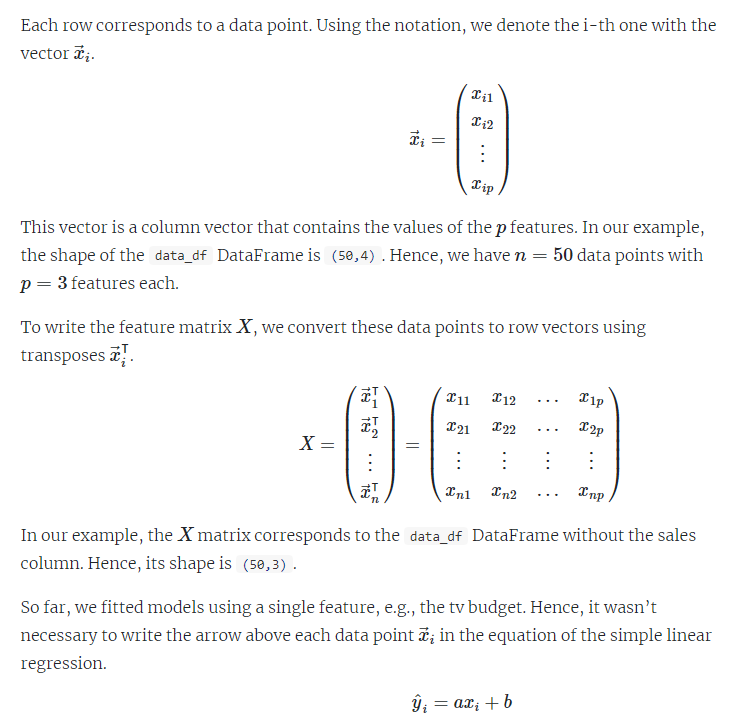

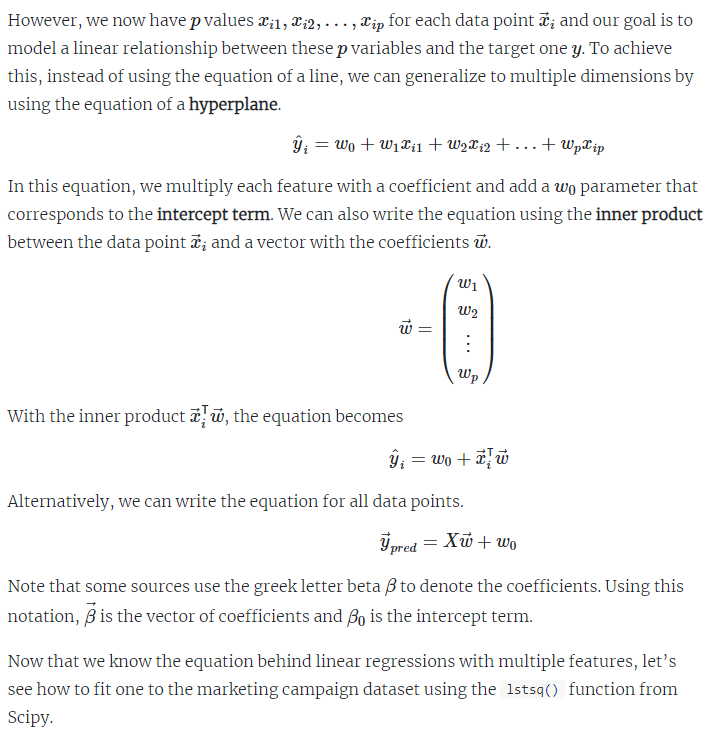

## Implementation with Scipy

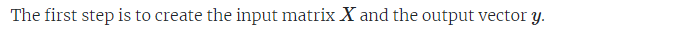

In [3]:
# Extract input matrix X
X = data_df.drop("sales", axis=1).values
print("X:", X.shape)

X: (50, 3)


In [4]:
# Extract target vector y
y = data_df.sales.values
print("y:", y.shape)

y: (50,)


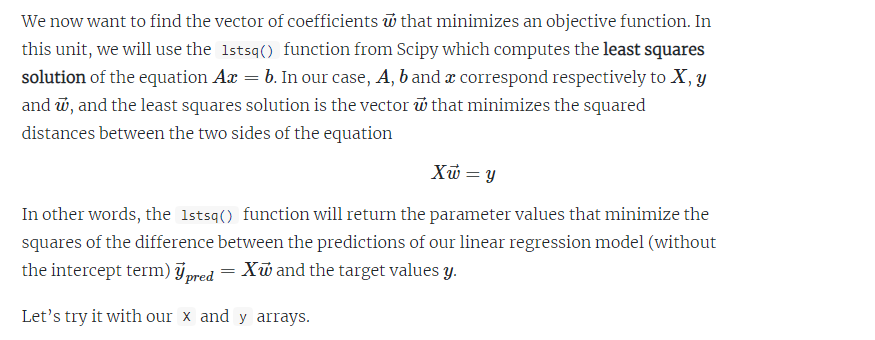

In [5]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
w, rss, _, _ = lstsq(X, y)
print("w:", w)
print("RSS:", rss)

w: [0.3958359  0.47521518 0.31040001]
RSS: 1.6884039033000016


The function returns four values. As for now, we will only look at the first two. The first one w is the vector of coefficients (one for each feature) and the second one rss is the residual sum of squares.

For reference, the RSS score of our simple linear regression model was around 15.7. Hence, we gained a lot in accuracy by bringing the two other marketing budgets in the equation.

## Adding the intercept term

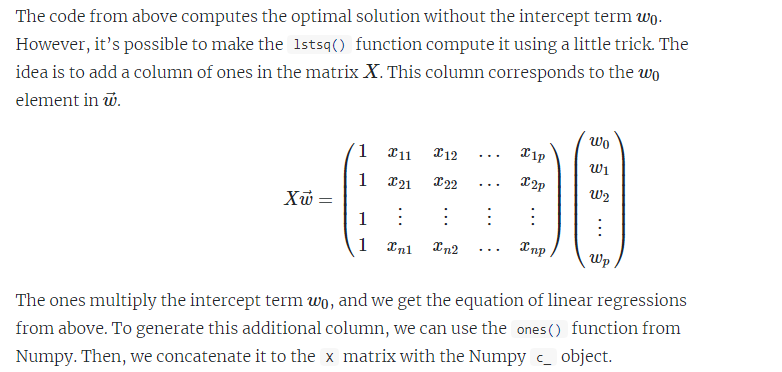


In [6]:
import numpy as np

# Add a column of ones
X1 = np.c_[np.ones(X.shape[0]),  # Vector of ones of shape (n,)
           X]                    # X matrix of shape (n,p)

X1[:5, :]

array([[ 1.   ,  0.916,  1.689,  0.208],
       [ 1.   ,  9.359,  1.706,  1.071],
       [ 1.   ,  5.261,  2.538,  2.438],
       [ 1.   ,  8.682,  2.092,  1.283],
       [ 1.   , 11.736,  1.66 ,  1.8  ]])

We can now pass the X1 matrix to the lstsq() function.

In [7]:
w, rss, _, _ = lstsq(X1, y)

print("w:", w)
print("RSS:", rss)

w: [0.02487092 0.39465146 0.47037002 0.30669954]
RSS: 1.6854508680824696


The array w has now four elements. The first one w[0] corresponds to the intercept term and the other three w[1:] to the coefficients. Note that the intercept is close to zero. Hence the RSS score didn’t change significantly.

We can now use this vector w to compute predictions.

In [8]:
# Compute predictions
y_pred = np.matmul(X1, w)
print("y_pred:", y_pred.shape)

y_pred: (50,)


This code computes the predictions for the data points in X, and we can verify that we get the same RSS score as lstsq().

In [9]:
# Verify RSS score
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


rss = RSS(y, y_pred)
print("RSS:", rss)

RSS: 1.6854508680824714


### Summary 

In this unit, we saw how to generalize linear regressions to multiple features, and how to implement them using the lstsq() function from Scipy. In practice, we usually work with higher level tools such as the LinearRegression object from Scikit-learn. However, it’s good to know how they work internally.

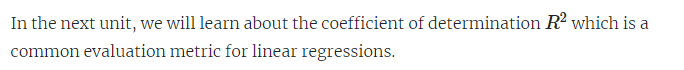

## 03. R^2 coefficient

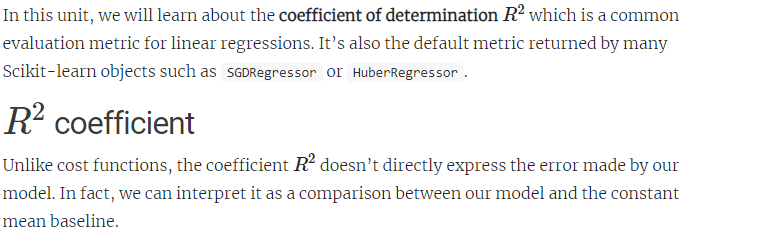

Let’s take an example. Say that we are working on the marketing campaign dataset.

In [10]:
import pandas as pd

# Load data
data_df = pd.read_csv("Ressources/c3_marketing-campaign.csv")
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

Our goal is to fit and evaluate a linear regression model. To achieve this, we define the RSS() function and start by evaluating the constant mean baseline.

In [12]:
import numpy as np

# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)

RSS baseline: 100.86060792


Now that we have a baseline, we can fit other models and compare them against this baseline score. For instance, let’s fit a linear regression using the code from the previous unit.

In [13]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
X1 = np.c_[np.ones(X.shape[0]), X]
w, model_rss, _, _ = lstsq(X1, y)
print("RSS:", model_rss)  # ~1.685

RSS: 1.6854508680824696


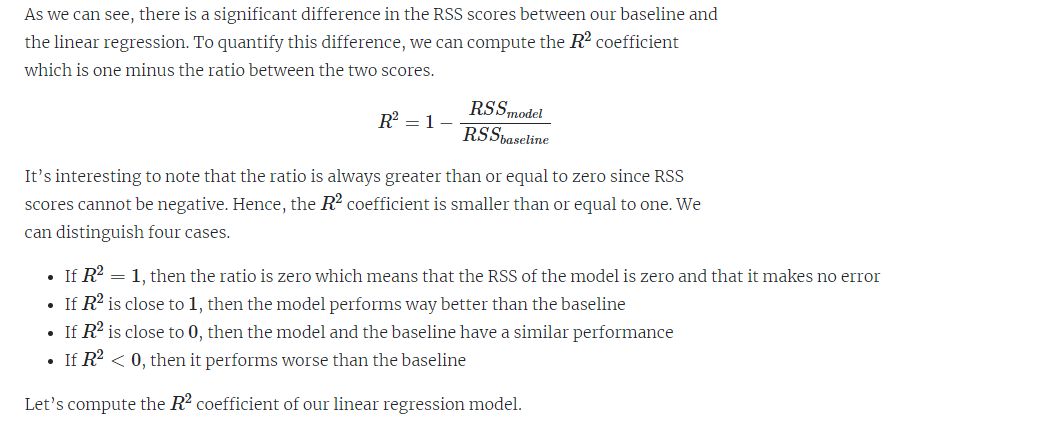

In [14]:
# R^2 coefficient
R2 = 1 - (model_rss / rss_baseline)
print("R^2 coefficient:", R2)  # Prints: ~0.983

R^2 coefficient: 0.9832893048848236


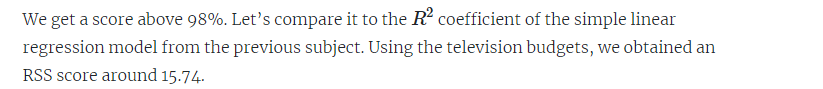

In [15]:
# R^2 of simple linear regression model
R2 = 1 - (15.74 / rss_baseline)
print("R^2 coefficient:", R2)  # Prints: ~0.844

R^2 coefficient: 0.8439430385697798


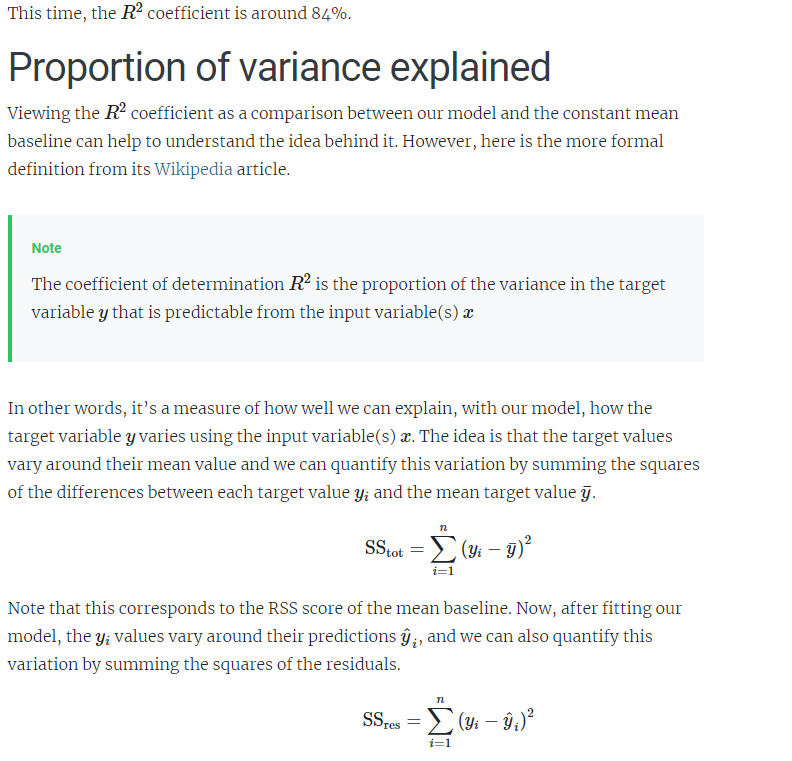

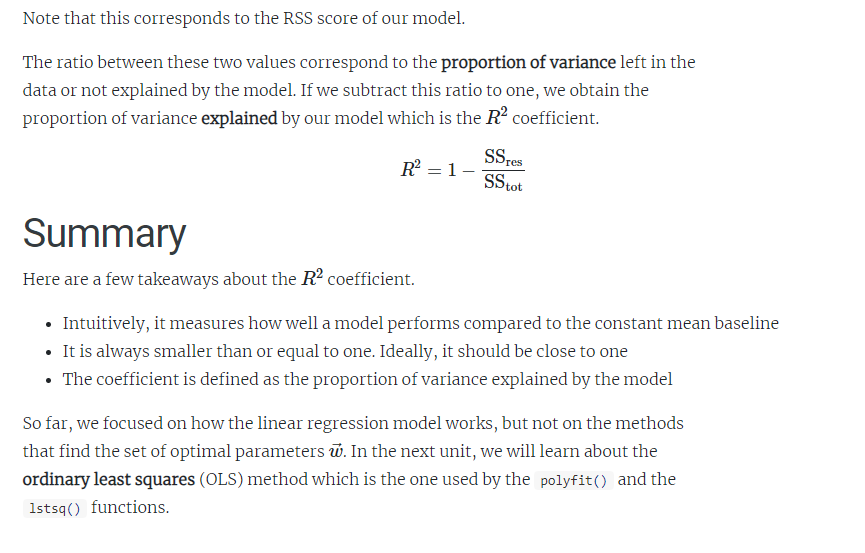

## 04. Ordinary least squares

The goal of this unit is to get familiar with the topic of **cost function optimization**. We will start with a review of derivatives and gradients, and see how we can use them to optimize cost functions.

In the second part of this unit, we will learn about the **ordinary least squares** (OLS) method which is the one used by the lstsq() function to compute the least squares solution. We will implement this method using basic Numpy code and get the set of optimal parameters of a linear regression model for the marketing campaign dataset.

### Cost functions and derivatives

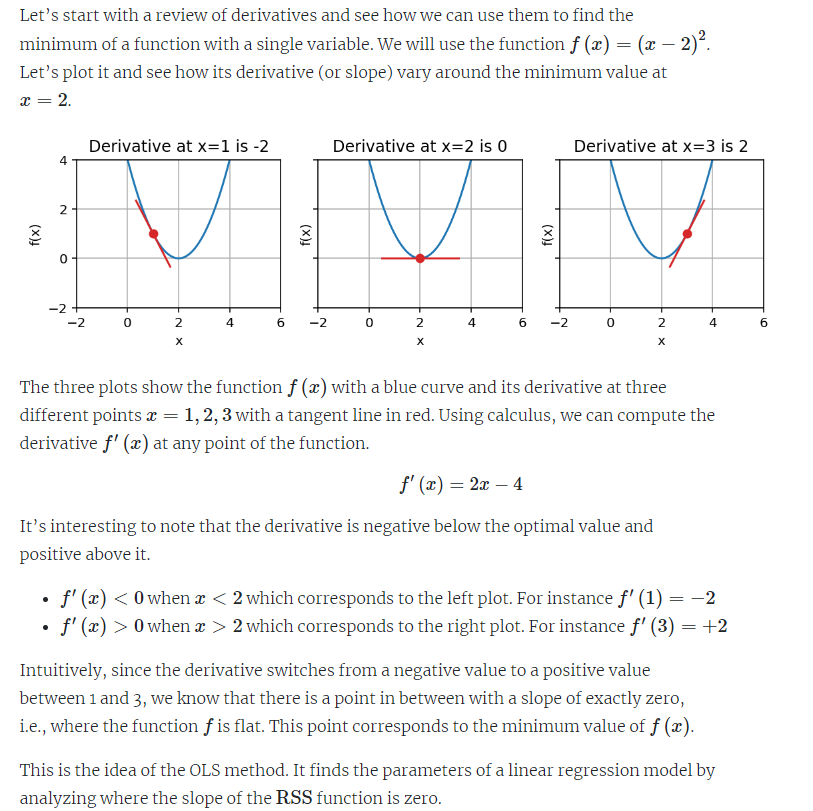



### Gradient of the cost function

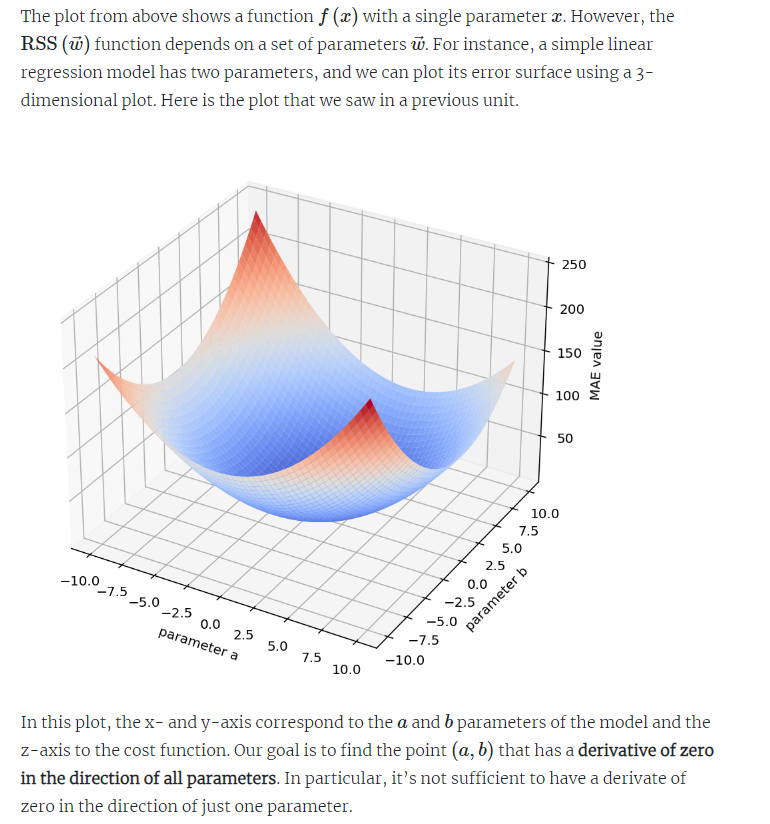

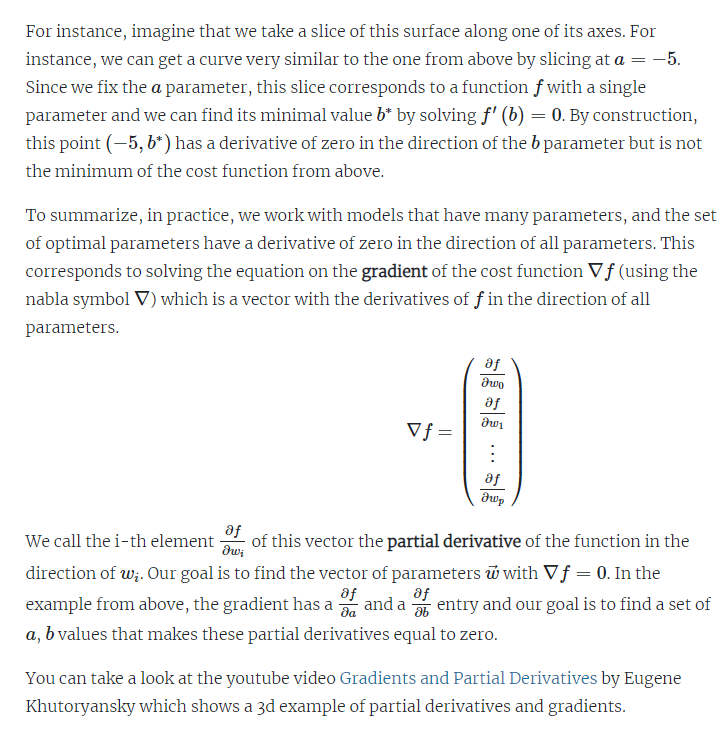

[Youtube Link](https://www.youtube.com/watch?v=GkB4vW16QHI)

### Ordinary least squares

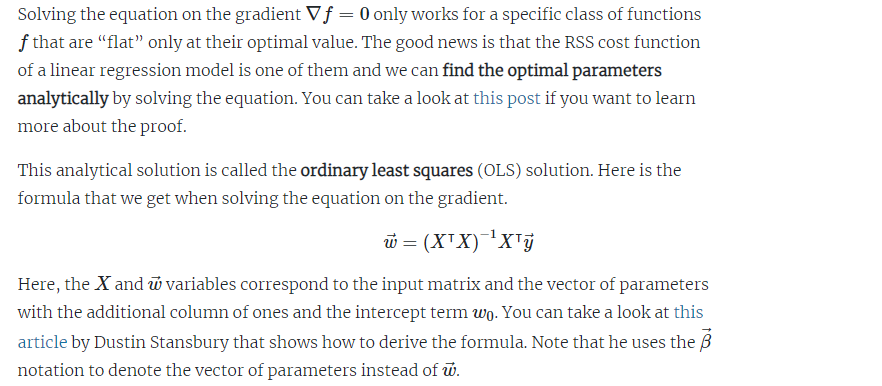

[This post](https://math.stackexchange.com/questions/483339/proof-of-convexity-of-linear-least-squares)

[This article](https://dustinstansbury.github.io/theclevermachine/derivation-normal-equations)
### OLS on the marketing campaign dataset

We will now implement the OLS method using the formula from above. Our goal is to find the set of optimal parameters of a linear regression model for the marketing campaign dataset.

Let’s start by loading the dataset into an X and a y Numpy array.



In [16]:
import pandas as pd

# Load data
data_df = pd.read_csv("ressources/c3_marketing-campaign.csv")
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

To implement the OLS formula, we first need to create the X matrix with the additional column of ones.

In [17]:
import numpy as np

# Create X1 matrix
X1 = np.c_[np.ones(X.shape[0]),  # Column of ones, shape: (n,)
           X]                    # Input matrix, shape: (n,p)

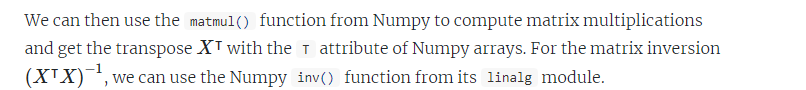

In [18]:
# Compute OLS solution
XX = np.matmul(X1.T, X1)
Xy = np.matmul(X1.T, y)
w = np.matmul(np.linalg.inv(XX), Xy)

print("w:", w)

w: [0.02487092 0.39465146 0.47037002 0.30669954]


We get a vector of parameters, each one corresponding to a column of the **X** matrix. The first one is the intercept term w0, and the three others are the coefficients for each marketing budget.

Let’s do a quick verification using the lstsq() function from Numpy.

In [19]:
from scipy.linalg import lstsq

# Verify with Scipy lstsq
w, _, _, _ = lstsq(X1, y)

print("w:", w)

w: [0.02487092 0.39465146 0.47037002 0.30669954]


We can see that we get the same parameter values.

### Summary
In this unit, we learned about the ordinary least squares (OLS) solution which is the standard way to find the set of parameters for **linear regressions**. In particular, we saw that it’s an **analytical solution** that minimizes the **RSS measure** by solving an equation on its gradient.

In the next unit, we will see how to implement linear regressions with the Scikit-learn library.

## 05. In Scikit-learn 
In this unit, we will see how to implement linear regressions with the Scikit-learn library.

### LinearRegression

First, let’s start by creating the X and y Numpy arrays.



In [21]:
import pandas as pd

# Load data
data_df = pd.read_csv("Ressources/c3_marketing-campaign.csv")
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

The Scikit-learn library provides a LinearRegression object that uses the OLS method to fit a linear regression model. Just like the HuberRegressor and the SGDRegressor ones, this object implements the fit() function. In the Scikit-learn jargon, these objects are **estimators** and the function is part of the **estimator API**.



In [22]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

# Print coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [0.39465146 0.47037002 0.30669954]
Intercept: 0.02487091788819562


In this code, we start by creating a LinearRegression() object. Then, we call fit() with the X, y variables. This function also relies on the lstsq() function from Scipy to compute the set of optimal parameters. However, note that we don’t have to add the additional column of ones to the input matrix X. The LinearRegression() object will automatically compute the intercept term w0. We can access the parameters with the coef_ and the intercept_ attributes.

For reference, here are the optimal coefficients that we computed in the last unit with the OLS formula.
> w: [ 0.02487092  0.39465146  0.47037002  0.30669954]

### Predict and score functions

Scikit-learn estimators also implement a predict() and a score() function.

The predict(X) function uses the coef_ and the intercept_ attributes to compute predictions for the data points in the X matrix.

In [23]:
# Compute predictions
y_pred = lr.predict(X)
y_pred[:3]

array([1.24462012, 4.84934038, 4.04266482])

We can also manually compute these predictions with the matmul() function from Numpy.

In [24]:
import numpy as np

y_pred = np.matmul(X, lr.coef_) + lr.intercept_
y_pred[:3]

array([1.24462012, 4.84934038, 4.04266482])

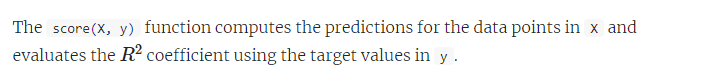

In [25]:
# Compute the R2 coefficient
R2 = lr.score(X, y)
print("R2:", R2)

R2: 0.9832893048848236


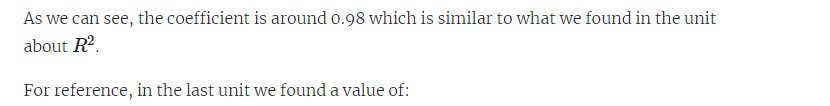

> R2: 0.983289304885

### SGDRegressor
The OLS method is the most common way to find the parameters of a linear regression model that minimize the squares of the residuals. However, in the unit about Huber loss, we saw the SGDRegressor object which implements a variant of the **gradient descent** (GD) algorithm.

It’s important to understand that this algorithm **doesn’t compute an analytical solution**. It’s an **iterative algorithm** that tries to get closer to the optimal solution after each iteration. However, unlike the OLS method, gradient descent is very generic and can optimize many different cost functions, e.g., Huber loss.

To minimize the squares of the residuals, we can set its loss parameter to squared_error. By default, it adds a **penalization term** to the cost function. We will learn more about it later in this course. As for now, we can set it 'none'.

In [26]:
from sklearn.linear_model import SGDRegressor

# Create the SGDRegressor object
lr_sgd = SGDRegressor(
    loss="squared_error",  # Cost function
    penalty="none",  # Add a penalty term?
    max_iter=1000,  # Number of iterations
    random_state=0,  # The implementation shuffles the data
    tol=1e-3,  # Tolerance for improvement (stop SGD once loss is below)
)

# Fit the linear regression model
lr_sgd.fit(X, y)

# Print coefficients
print("Coefficients:", lr_sgd.coef_)
print("Intercept:", lr_sgd.intercept_)

Coefficients: [0.39968853 0.44409771 0.25894341]
Intercept: [0.12807209]


The implementation of the SGDRegressor object shuffles the data before running the optimization algorithm. To get the results from above, you should set its random_state parameter to zero.

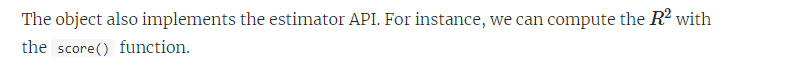

In [27]:
# Compute R2 coefficient
R2_sgd = lr_sgd.score(X, y)
print("R2_sgd:", R2_sgd)

R2_sgd: 0.9821546772612869


### Huber loss
We usually fit linear regressions using the **least squares** approach, i.e., minimizing the squares of the residuals. However, it’s also possible to use other objective functions such as Huber loss.

To achieve this, we can create an HuberRegressor object which also implements the estimator interface.

In [28]:
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=1.35)

# Fit it to X,y
huber.fit(X, y)

print("Coefficients:", huber.coef_)
print("Intercept:", huber.intercept_)
print("R^2 coefficient:", huber.score(X, y))

Coefficients: [0.39172544 0.4788203  0.29315421]
Intercept: 0.04586298819194146
R^2 coefficient: 0.9830701571142849


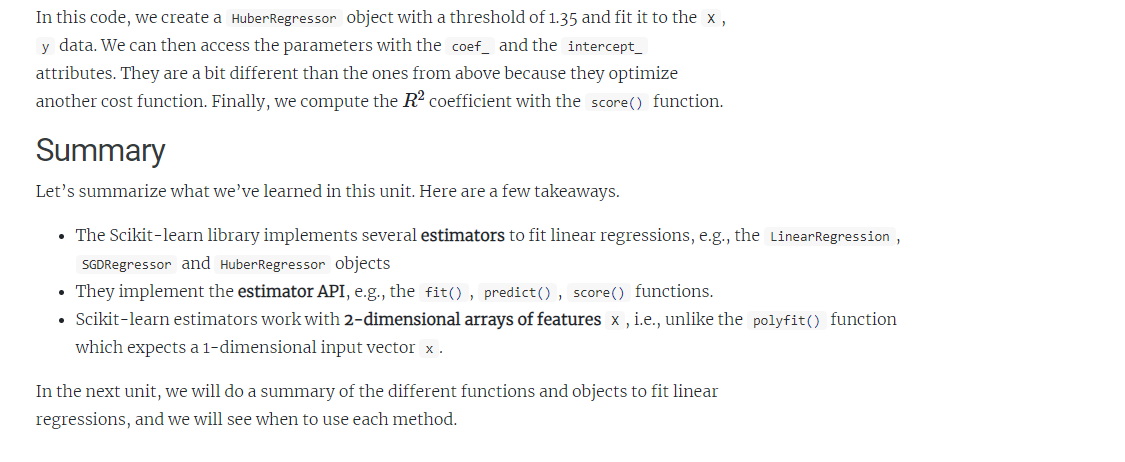

## 06. How to choose the appropriate method?

We’ve seen many different functions and objects to fit linear regressions. Let’s do a summary and see when to use each method.

### Numpy polyfit

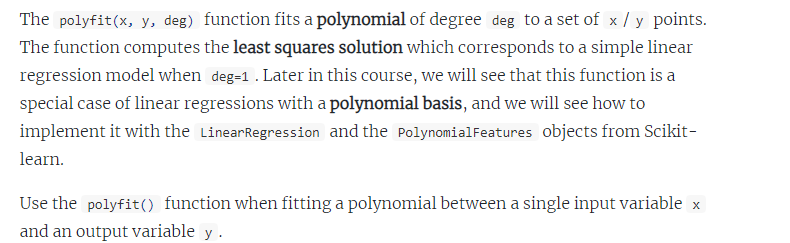

### OLS: Numpy implementation

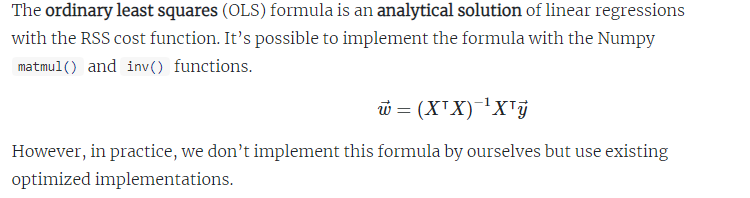

### OLS: Scipy lstsq

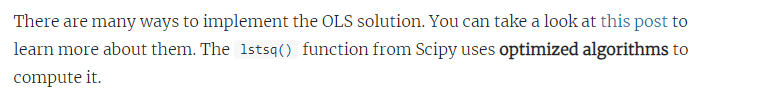

[This post](https://www.quora.com/Is-it-better-to-do-QR-Cholesky-or-SVD-for-solving-least-squares-estimate-and-why)

### Scikit-learn LinearRegression

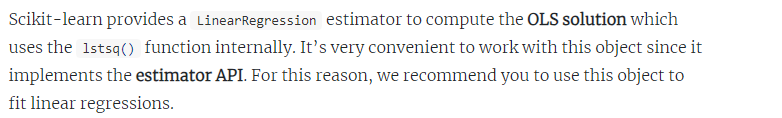

### Scikit-learn HuberRegressor

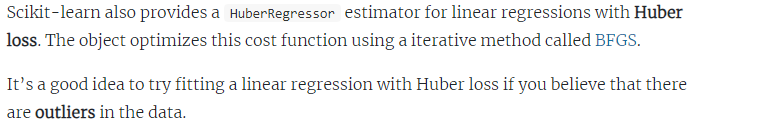

### Scikit-learn SGDRegressor

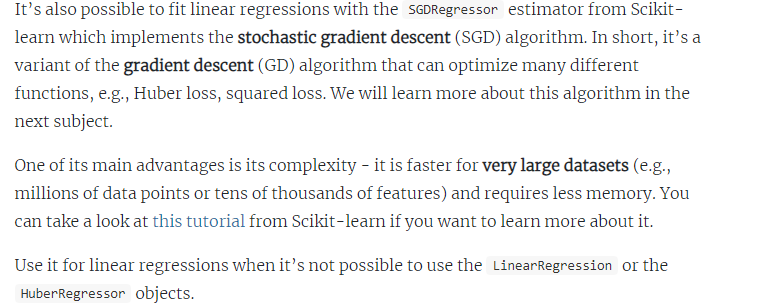

## 07. Ill-conditioning

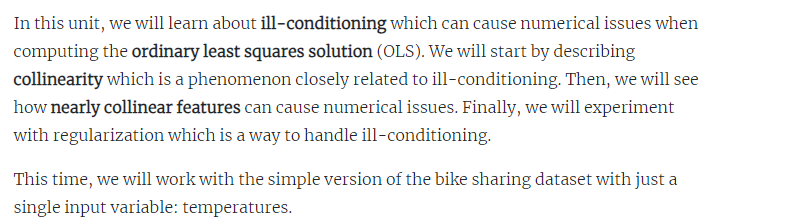

### Collinearity

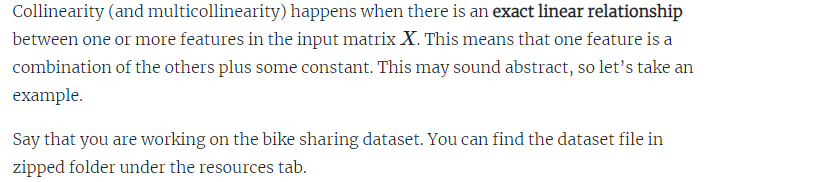



In [29]:
import pandas as pd

# Load data
data_df = pd.read_csv("Ressources/c3_bike-sharing.csv")

# Create Numpy arrays
temp = data_df.temp.values
users = data_df.users.values

# First five rows
data_df.head()


temp  users
0  0.1964    120
1  0.2000    108
2  0.2270     82
3  0.2043     88
4  0.1508     41

As we can see, temperatures are not in degrees Celsius or Fahrenheit. In fact, the [dataset web page](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) states that the original temperatures in degrees Celsius temp_C were rescaled between zero and one using the formula temp=(temp_C+8)/47.

We will see later that rescaling features is a good idea in some cases. At the moment, however, you might want to work with temperatures in degrees Celsius temp_C rather than the standardized version temp. To compute this new temp_C variable, we can simply revert the formula from above.

In [30]:
# Create collinear feature
temp_C = 47 * temp - 8

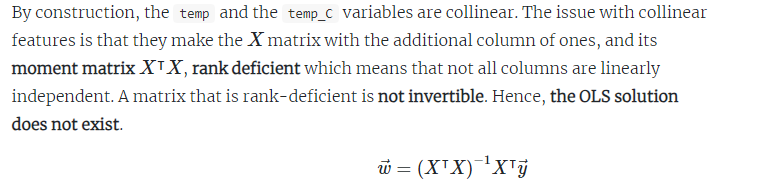

Let’s illustrate this with the temperature variables.

In [31]:
import numpy as np

# Create input matrix X
X = np.c_[temp, temp_C]

# Add a column of ones
X1 = np.c_[np.ones(X.shape[0]), X]

# Compute rank
rank = np.linalg.matrix_rank(X1)
print("Rank", rank)

Rank 2


In this code, we create the input matrix X with the collinear variables temp and temp_C. We then add a column of ones and end up with an input matrix X1 with three columns. This matrix is rank-deficient because its number of independent features is 2. This number is called the rank of the matrix, and we say that X1 is rank-deficient because its rank is not maximal, i.e., it’s not 3.

### Collinearity in practice

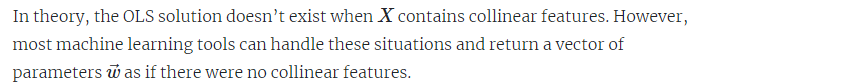

In [32]:
from scipy.linalg import lstsq

# Compute OLS using lstsq
w, rss, rank, _ = lstsq(X1, users)

print("w:", w)
print("rank:", rank)
print("RSS:", rss)

w: [155.34445517  27.10638524  31.24446504]
rank: 2
RSS: []


In this code, we call the lstsq() function with the rank-deficient matrix X1 which returns a set of parameters w, the rank of the matrix, and the RSS score which is an array of length zero when the matrix is rank-deficient. The function also returns the singular values of the matrix (the fourth return value), but we can discard this result by assigning it to the [“throwaway” variable](https://stackoverflow.com/questions/5893163/what-is-the-purpose-of-the-single-underscore-variable-in-python) _.

Let’s compare the performance of this model to a simple linear regression with the R2 coefficient. We can use the r2_score(y,y_pred) function from the Scikit-learn metrics module.

In [33]:
from sklearn.metrics import r2_score

# R^2 coefficient of simple linear regression
coefs = np.polyfit(temp, users, deg=1)
y_pred_normal = np.polyval(coefs, temp)
r2_normal = r2_score(users, y_pred_normal)
print("R^2 normal:", r2_normal)

R^2 normal: 0.5954233080185317


In [34]:
# R^2 coefficient with collinear features
y_pred_collinear = np.matmul(X1, w)
r2_collinear = r2_score(users, y_pred_collinear)
print("R^2 collinear:", r2_collinear)

R^2 collinear: 0.5954233080185318


We can see that collinearity didn’t affect performance in this case.

### Nearly collinear features
Sometimes, features are highly correlated but there isn’t a perfect linear relationship between them. These are **nearly collinear features**.

For instance, say that we measure temperatures with two different thermometers. One gives temperatures in degrees Celsius and the other in degrees Fahrenheit. To simulate this scenario, we can simply convert the temp_C values to degrees Fahrenheit.

In [35]:
# Convert to degrees Celsius to Fahrenheit
temp_F = 1.8 * temp_C + 32

It’s unlikely that the two thermometers give the same temperature values. In that sense, temp_F and temp_C are nearly collinear features. To simulate this difference, we can add a small noise to the temp_F variable.

In [36]:
def compute_ols_with_noise(temp_C, users):

    # Convert to degrees Fahrenheit
    temp_F = 1.8 * temp_C + 32

    # Add small variations
    noise = np.random.normal(loc=0, scale=0.01, size=temp_F.shape)
    temp_F += noise

    # Create input matrix X
    X = np.c_[temp_C, temp_F]

    # Compute OLS using lstsq
    X1 = np.c_[np.ones(X.shape[0]), X]  # Create X1 matrix
    w, rss, rank, _ = lstsq(X1, users)  # OLS

    return w, rss, rank, X1


w, rss, rank, X1 = compute_ols_with_noise(temp_C, users)

print("rank:", rank)  # Returns: 3
print("RMSE:", np.sqrt(rss / len(users)))  # Depends on the noise value
print("w:", w)  # Depends on the noise value


rank: 3
RMSE: 232.2431816651942
w: [-78679.52882356  -4402.8575833    2463.7165434 ]


In this code, we generate a random noise using a Gaussian distribution centered at zero and with a standard deviation of 0.01.

This time, X1 is full rank and the lstsq() function returns the residual sum of squares. If you run the code several times, you can see that the coefficients vary a lot.

In [37]:
txt_fmt = "{:<5}{:<6}{:<20}{:}"
print(txt_fmt.format("run", "rank", "RMSE", "coefficients"))
for i in range(5):
    w, rss, rank, X1 = compute_ols_with_noise(temp_C, users)  # Compute OLS using lstsq
    print(txt_fmt.format(i, rank, np.sqrt(rss / len(users)), w))

run  rank  RMSE                coefficients
0    3     233.29834733205547  [-19087.98541747  -1050.73948422    601.45773231]
1    3     232.9320944938395   [-46860.40573487  -2612.91487293   1469.35137554]
2    3     233.16091135517135  [32926.21263872  1874.98346771 -1023.96538245]
3    3     233.34688610225712  [-10013.84274141   -540.46618538    317.93413602]
4    3     231.89207986492792  [-85251.28831266  -4772.71471091   2669.15048446]


This is due to ill-conditioning.

### Ill-conditioning
In the example from above, X1 has full-rank and the OLS solution exists. However, it’s numerically unstable. A small change in the data produces very different coefficients. We can quantify this phenomenon with the **condition number**. Inverting a matrix with a large condition number is **numerically unstable**.

We can compute the condition number of X1 with the cond() function from the Numpy linalg module.

In [38]:
# Condition number
cn = np.linalg.cond(X1)
print("Condition number:", cn)  # Depends on the noise value

Condition number: 216659.55412148367


The value of cn depends on the noise in the X1 matrix from above. However, you should get a value above 200 thousand. By increasing the scale of the noise, you decrease the correlation between the two variables and you should see that it reduces the condition number.

Again, ill-conditioning doesn’t necessarily affect the **predictive accuracy** of the model. In most cases, it will simply result in **large variations** in the model coefficients.

In [39]:
# Same with the nearly collinear matrix
y_pred_nearcol = np.matmul(X1, w)
r2_nearcol = r2_score(users, y_pred_nearcol)

# R^2 coefficient with nearly collinear features
print("R^2 nearly collinear:", r2_nearcol)

R^2 nearly collinear: 0.6005207953542848


### Regularization
One way to solve ill-conditioning is to create a **constraint on the coefficients**. The idea is to modify the objective function and add a **regularization term** that **penalizes** large coefficients.

Scikit-learn implements regularization with the Ridge estimator which is similar to the LinearRegression one.

In [40]:
from sklearn.linear_model import Ridge


def compute_with_regularization(temp_C, users):

    # Add small variations
    noise = np.random.normal(loc=0, scale=0.01, size=temp_C.shape)
    temp_F = (1.8 * temp_C + 32) + noise

    # Create input matrix X
    X = np.c_[temp_C, temp_F]

    # Fit a Ridge regression
    ridge = Ridge(alpha=100)
    ridge.fit(X, users)

    return ridge, X

ridge, X = compute_with_regularization(temp_C, users)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("R^2:", ridge.score(X, users))

Coefficients: [ 7.30507452 13.60321207]
Intercept: -274.8319696123692
R^2: 0.5954532965275143


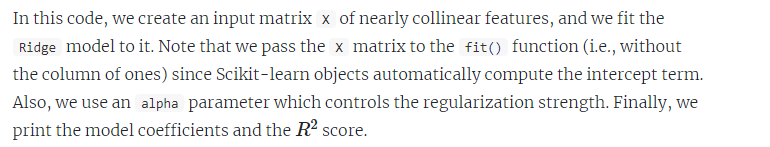

If you run the code several times, you should see that the coefficient are more stable than before.

In [41]:
txt_fmt = "{:<5}{:<27}{:<21}{:}"
print(txt_fmt.format("run", "coefficients", "intercept", "R^2"))
for i in range(5):
    ridge, X = compute_with_regularization(temp_C, users)
    print(txt_fmt.format(i, str(list(ridge.coef_.round(8))),
                         ridge.intercept_, ridge.score(X, users)))

run  coefficients               intercept            R^2
0    [7.71833521, 13.37316048]  -267.45829805276196  0.5953886565650446
1    [7.5078137, 13.48979524]   -271.1764606193208   0.5954212523616025
2    [7.53343302, 13.47636214]  -270.78016181456314  0.5954173523265645
3    [7.57958494, 13.44988579]  -269.9212140410333   0.5954100476629782
4    [7.61529533, 13.43018914]  -269.30045323278057  0.5954045279662978


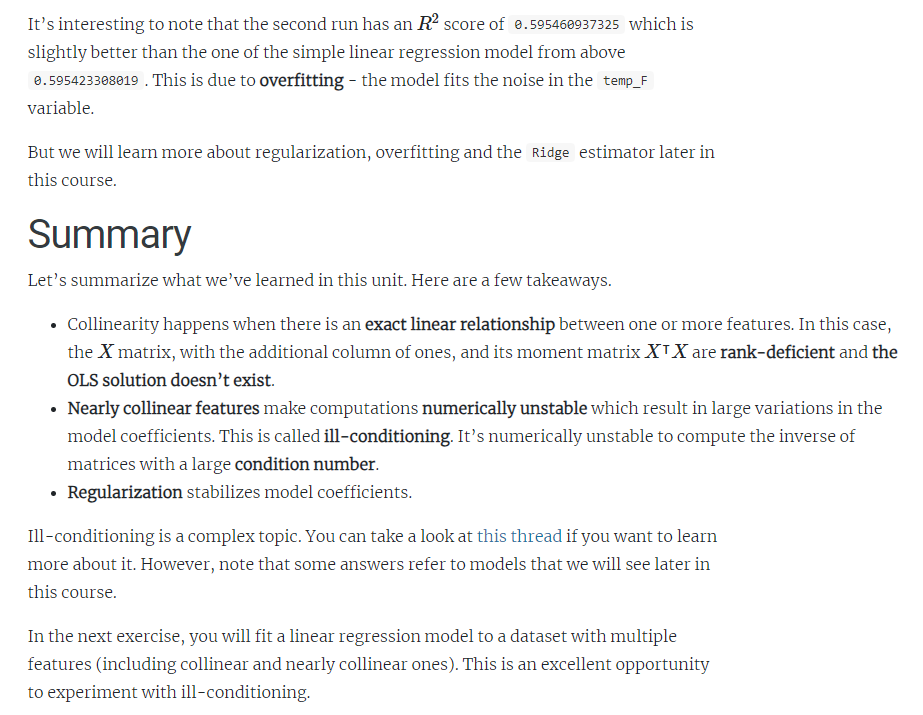

[This thread](https://stats.stackexchange.com/questions/168622/why-is-multicollinearity-not-checked-in-modern-statistics-machine-learning)

## 08. Exercise - Bike sharing linear regression

### Task instructions
In the last exercise, we worked on a simplified version of the bike sharing dataset with only one feature: the temperature values. We used a training set to fit the different models, and we compared them to a baseline using a test set.

In this exercise, we are going to perform the same analysis using some additional features. Here are the first five rows of the training set.

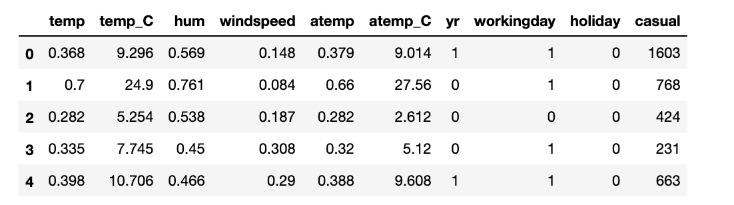

Our goal is to predict the number of casual users using the other variables. You can download the exercise and data from the resources section.

### Data description
There are **nine features** and one target variable.

- temp - normalized temperatures, i.e., range between zero and one
- temp_C - temperatures in degrees Celsius
- hum - humidity
- windspeed - normalized wind speed, i.e., ranges between zero and one
- atemp - apparent temperature which combines temperatures, wind speed and humidity
- atemp_C - apparent temperature in degrees Celsius
- yr - year: 0 for 2011 and 1 for 2012
- workingday - whether it’s a working day
- holiday - whether it’s a holiday
- casual - the target variable: number of casual users, i.e., users not registered

For this exercise, we ask you to detect and remove features that make the X  matrix, with the column of ones, rank deficient. Also, you might want to remove nearly collinear features if you obtain better results without them.

### Separate sources
In the last exercise, we saw that the dataset has several points associated with a large number of users. In fact, by plotting the ones that correspond to non-working days with a different color, we can see that the data comes from **two sources**.

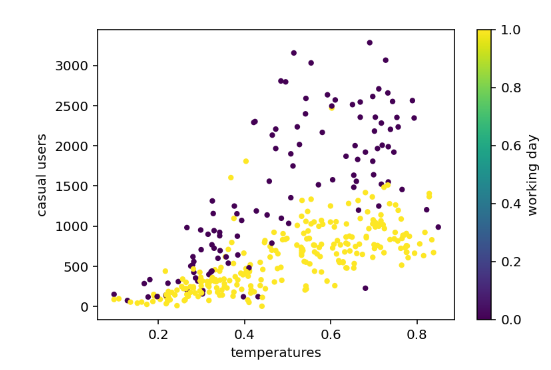

Data points collected during non-working days have a higher number of casual users than ones collected during working days, which makes sense.

In this case, we say that the data comes from different sources. Hence, it’s a good idea to try separating the data points and fit a different model to each source.

**Go into Ressources/c3_exercise_bike_sharing_regression.ipynb**